# Eigenvector Clustering

Once the eigenvectors are obtained, we have a continuous solution for a discrete problem. In order to obtain an assigment for every pattern,  it is needed to discretize the eigenvectors.
Obtaining this discrete solution from eigenvectors often requires solving another clustering problem, albeit in a lower-dimensional space. That is, eigenvectors are treated as geometrical coordinates of a point set.

This library provides two methods two obtain the discrete solution:
- Kmeans by means of [Clustering.jl](https://github.com/JuliaStats/Clustering.jl)
- The one proposed in [Multiclass spectral clustering](#stella2003multiclass)


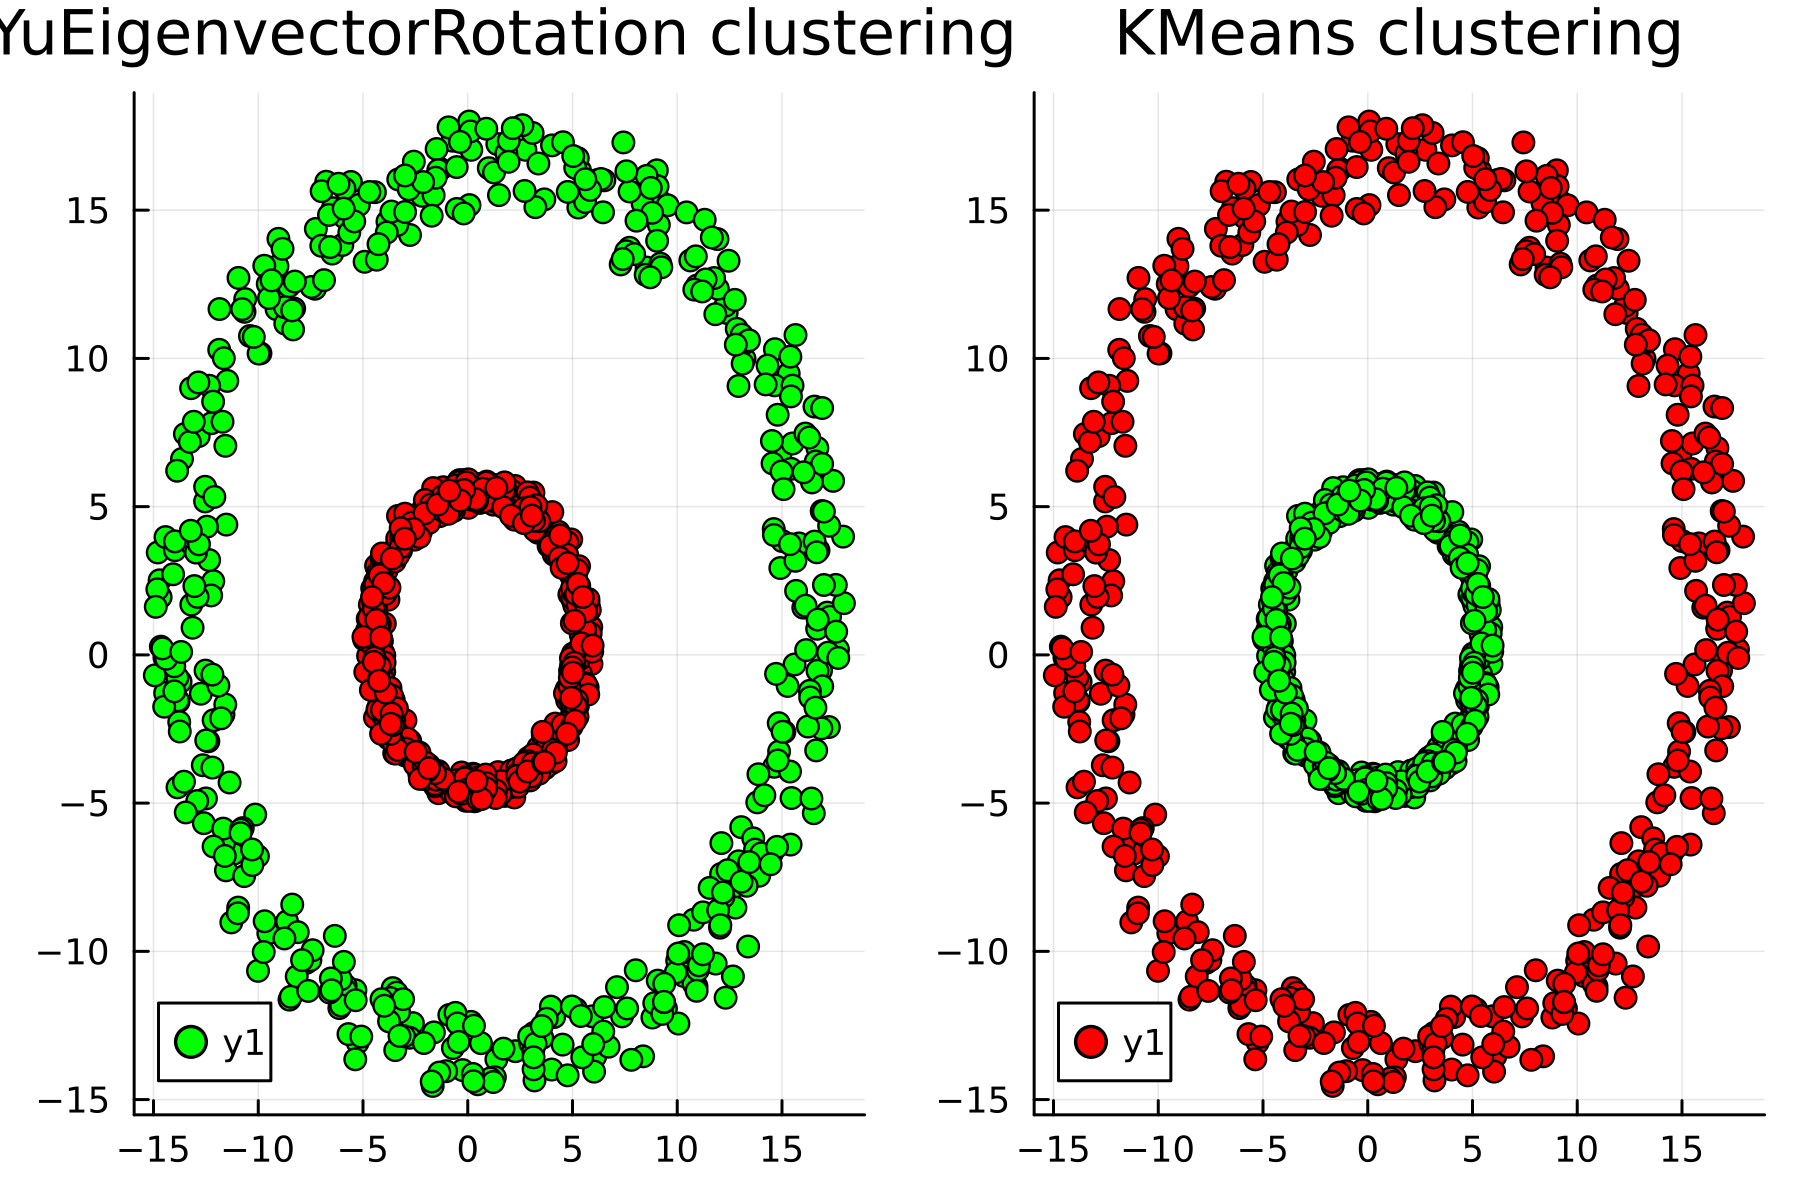

In [2]:
using  Distances,SpectralClustering, Plots, Clustering
function circle(N::Integer , r1::Float64)
    x = []
    y = []    
    for j =1:N
        angle = rand(0.0:0.001:2*pi)
        v = r1*exp(im*angle)
        push!(x, real(v) + rand()*r1*0.2)
        push!(y, imag(v) + rand()*r1*0.2)        
    end    
    return hcat(x, y)
end
function circle_in_circle(N::Integer, r1::Float64, r2::Float64)
    circle_1 = circle(N, r1)
    circle_2 = circle(N, r2)
    
    return (vcat(circle_1, circle_2)', vcat(ones(N), ones(N)*2))
end


function weight(i::Integer, neigh, v, m)
    return exp.(-Distances.colwise(SqEuclidean(), m, v) / 7)
end
(data, labels) = circle_in_circle(500, 15.0, 5.0)
knnconfig = KNNNeighborhood(data, 15)
graph = create(knnconfig, weight, data)
pred_clustering_1 = clusterize(NgLaplacian(2), KMeansClusterizer(2), graph)
pred_clustering_2 = clusterize(NgLaplacian(2, false), YuEigenvectorRotation(), graph)
colors =[RGB(1.0, 0.0, 0.0), RGB(0, 1.0, 0.0)]
plt1 = scatter(data[1, :], data[2, :], 
               color=[colors[i] for i in pred_clustering_1.assignments],
               title="KMeans clustering")
plt2 = scatter(data[1, :], data[2, :], 
               color=[colors[i] for i in pred_clustering_2.assignments],
               title="YuEigenvectorRotation clustering")
Plots.plot(plt2, plt1, layout=(@layout Plots.grid(1,2)))

# References

In [4]:
using DocUtils
display("text/html",bibliography(["stella2003multiclass"]))

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01//EN">
 
 
 
 Bibliography 
 
 
 
 SS003 
 X Yu Stella and Jianbo Shi.
Multiclass spectral clustering.
In null . IEEE, 2003.